In [1]:
from keras.datasets import  mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data('mnist.npz')


Using TensorFlow backend.
D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\tenso

In [5]:
print(x_train.shape,type(x_train))
print(y_train.shape)

(60000, 784) <class 'numpy.ndarray'>
(60000,)


In [4]:
# 将图像本身从[28,28]转换为[784,]
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
# 将数据类型转换为float32
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
# 数据归一化
x_train/=255
x_test/=255



In [6]:
import numpy as np
import  matplotlib.pyplot as plt

label,count=np.unique(y_train,return_counts=True)
print(label,count)


[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


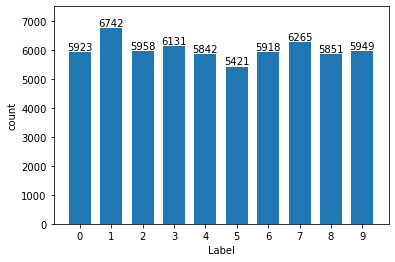

In [8]:
fig=plt.figure()
plt.bar(label,count,width=0.7,align='center')
plt.xlabel('Label')
plt.ylabel('count')
plt.xticks(label)
plt.ylim(0,7500)
for a,b in zip(label, count): #显示数字
    plt.text(a, b, '%d' % b, ha='center', va='bottom',fontsize=10)
plt.show()

In [9]:
from keras.utils import  np_utils
n_class=10
y_train=np_utils.to_categorical(y_train,n_class)
y_test=np_utils.to_categorical(y_test,n_class)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
from keras.models import Sequential
from keras.layers import Dense,Softmax,ReLU
model=Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(ReLU())

model.add(Dense(512))
model.add(ReLU())

model.add(Dense(10))
model.add(Softmax())



In [11]:
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_2 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
softmax_1 (Softmax)          (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'] , optimizer='adam')



In [13]:
history=model.fit(x_train,y_train,batch_size=128,epochs=5,verbose=2,validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 8s - loss: 0.2178 - acc: 0.9354 - val_loss: 0.1075 - val_acc: 0.9680
Epoch 2/5
 - 7s - loss: 0.0789 - acc: 0.9757 - val_loss: 0.0833 - val_acc: 0.9728
Epoch 3/5
 - 7s - loss: 0.0519 - acc: 0.9836 - val_loss: 0.0737 - val_acc: 0.9765
Epoch 4/5
 - 7s - loss: 0.0363 - acc: 0.9886 - val_loss: 0.0708 - val_acc: 0.9793
Epoch 5/5
 - 7s - loss: 0.0277 - acc: 0.9912 - val_loss: 0.0932 - val_acc: 0.9728


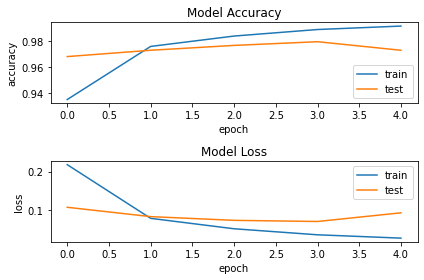

In [14]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

plt.show()



In [15]:
#保存模型
import  os
import tensorflow.gfile as gfile
save_path='./model'
if(gfile.Exists(save_path)):
    gfile.DeleteRecursively(save_path)
else:
    gfile.MakeDirs(save_path)

model_name='keras_mnist.h5'
model_path=os.path.join(save_path,model_name)
model.save(model_path)



In [16]:
from keras.models import  load_model

mnist_model=load_model(model_path)

loss_and_metrics = mnist_model.evaluate(x_test, y_test, verbose=2)

print("Test Loss: {}".format(loss_and_metrics[0]))
print("Test Accuracy: {}%".format(loss_and_metrics[1]*100))

predicted_classes = mnist_model.predict_classes(x_test)
#下面应该是都是一维的互相比较，我这里已经变成了（10000，10）
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count: {}".format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

Test Loss: 0.09319184140936704
Test Accuracy: 97.28%
Classified correctly count: 0
Classified incorrectly count: 1


D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':
D:\Anoconda2\envs\Tensorflow2021\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]
